In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import json
import cv2
import pickle
from utils import CocoImageFolder, to_var, show_images
from adaptive import Encoder2Decoder
from build_vocab import Vocabulary
from torch.autograd import Variable 
from torchvision import transforms

pretrained = 'models-attentive/adaptive-17.pkl'
# images_path = './data/resized/val2014/'
images_path = './data/resized/test2014/'
vocab_path = './data/vocab.pkl'
# caption_test_path = './data/annotations/captions_val2014.json'
caption_test_path = './data/annotations/image_info_test2014.json'
eval_size = 5
num_workers = 4

with open( vocab_path, 'rb') as f:
    vocab = pickle.load( f )

# Image transformation
transform = transforms.Compose([ 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), 
                         (0.229, 0.224, 0.225))])

# Evaluation test image loader
cocoFolder = CocoImageFolder( images_path, caption_test_path, transform )
test_data_loader = torch.utils.data.DataLoader( 
        cocoFolder, 
        batch_size = eval_size, 
        shuffle = False, num_workers = 4,
        drop_last = False )
len(test_data_loader)

# Define model and load pretrained
model = Encoder2Decoder( 256, len( vocab ), 512 )
model.load_state_dict( torch.load( pretrained ) )
model.eval()

if torch.cuda.is_available():
    model.cuda()

In [2]:
# res = []

# # every item in list is a batch of imgs, imgids, filenames
# for i, (images, image_ids, filenames) in enumerate(test_data_loader):\
    
#     if i % 1000 == 0:
#         print("Processed", i)
    
#     images = to_var( images )
# #     generated_captions, attention, beta = model.sampler( images )
#     generated_captions, attention, beta = model.mysampler( images, beam_size=3 )
    
#     captions = generated_captions.cpu().data.numpy()
    
#     for image_idx in range( captions.shape[ 0 ] ):
        
#         sampled_ids = captions[ image_idx ]
#         sampled_caption = []
        
#         for word_id in sampled_ids:
                
#             word = vocab.idx2word[ word_id ]
#             if word == '<end>':
#                 break
#             else:
#                 sampled_caption.append( word )
                
#         sentence = ' '.join( sampled_caption )
        
# #         img = cv2.imread( images_path + filenames[ image_idx ] )
# #         img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
        
#         res.append({"image_id": image_ids[image_idx], "caption": sentence})
        
# #         # Plot
# #         print 'Image:', filenames[ image_idx ]
# #         print 'Generated caption:', sentence 
# #         plt.imshow(img)
# #         plt.axis("off")
# #         plt.show()
# #         print ''

# with open('./results/test-sca-beam3.json', 'w') as file:
#     json.dump(res, file)

In [3]:
# res = []

# # every item in list is a batch of imgs, imgids, filenames
# for i, (images, image_ids, filenames) in enumerate(test_data_loader):\
    
#     if i > L:
#         break
#     if i != L:
#         continue
    
#     images = to_var( images )
#     generated_captions, attention, beta = model.sampler( images )
# #     generated_captions, attention, beta = model.mysampler( images, beam_size=3 )
    
#     captions = generated_captions.cpu().data.numpy()
    
#     for image_idx in range( captions.shape[ 0 ] ):
        
#         sampled_ids = captions[ image_idx ]
#         sampled_caption = []
        
#         for word_id in sampled_ids:
                
#             word = vocab.idx2word[ word_id ]
#             if word == '<end>':
#                 break
#             else:
#                 sampled_caption.append( word )
                
#         sentence = ' '.join( sampled_caption )
        
#         img = cv2.imread( images_path + filenames[ image_idx ] )
#         img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
        
#         print 'Attention Map of image:', filenames[ image_idx ]
#         print 'Generated caption b1:', sentence
        
#         plt.imshow(img)
#         plt.axis("off")
#         plt.show()

#         print ''
        
# #         res.append({"image_id": image_ids[image_idx], "caption": sentence})
        
# #         # Plot
# #         print 'Image:', filenames[ image_idx ]
# #         print 'Generated caption:', sentence 
# #         plt.imshow(img)
# #         plt.axis("off")
# #         plt.show()
# #         print ''

# # with open('./results/test-sca-beam3.json', 'w') as file:
# #     json.dump(res, file)

In [4]:
vocab.word2idx["<pad>"]

0

Attention Map of image: COCO_test2014_000000244265.jpg
Generated caption b1: a group of people sitting on a bench .
Generated caption b3: a group of people sitting on a bench .
Generated caption b5: a group of people sitting on a bench .
Generated caption b7: a group of people sitting on a bench .


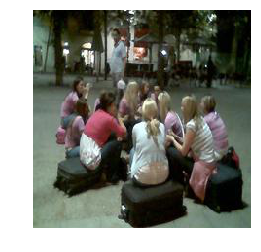


Attention Map of image: COCO_test2014_000000385883.jpg
Generated caption b1: a stuffed animal is sitting on a couch .
Generated caption b3: a stuffed animal is sitting on a couch .
Generated caption b5: a stuffed animal is sitting on a couch .
Generated caption b7: a stuffed animal is sitting on a couch .


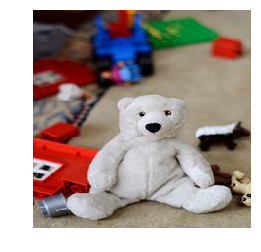


Attention Map of image: COCO_test2014_000000540381.jpg
Generated caption b1: a cat sitting on a chair in a bathroom .
Generated caption b3: a cat sitting on a chair in a bathroom .
Generated caption b5: a cat sitting on a chair in a bathroom .
Generated caption b7: a cat sitting on a chair in a bathroom .


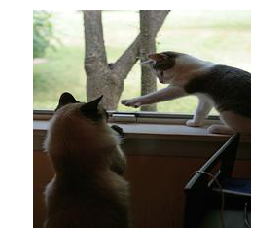


Attention Map of image: COCO_test2014_000000398972.jpg
Generated caption b1: a giraffe is standing in a field with a giraffe .
Generated caption b3: a giraffe is standing in a field with a giraffe .
Generated caption b5: a giraffe is standing in a field with a giraffe .
Generated caption b7: a giraffe is standing in a field with a giraffe .


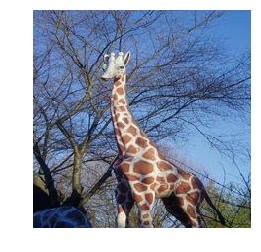


Attention Map of image: COCO_test2014_000000097714.jpg
Generated caption b1: a man sitting at a table with a cake on top of it .
Generated caption b3: a man sitting at a table with a cake on top of it .
Generated caption b5: a man sitting at a table with a cake on top of it .
Generated caption b7: a man sitting at a table with a cake on top of it .


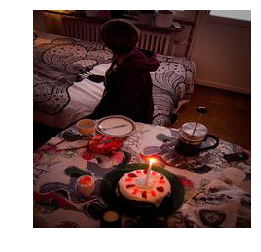

In [8]:
res = []
L = 1001
decay = 1

def getSentence(captions, image_idx):
    sampled_ids = captions[ image_idx ]
    sampled_caption = []
    
    for word_id in sampled_ids:
                
        word = vocab.idx2word[ word_id ]
        if word == '<end>':
            break
        else:
            sampled_caption.append( word )

#     cap_len = len( sampled_caption )
    sentence = ' '.join( sampled_caption )
    
    return sentence
    

# every item in list is a batch of imgs, imgids, filenames
for i, (images, image_ids, filenames) in enumerate(test_data_loader):
    
    if i > L:
        break
    if i != L:
        continue
    
    images = to_var( images )
#     generated_captions, attention, beta = model.sampler( images )
    generated_captions, attention, beta = model.mysampler( images, beam_size=1, decay=decay )
    generated_captions3, _, _ = model.mysampler( images, beam_size=3, decay=decay )
    generated_captions5, _, _ = model.mysampler( images, beam_size=5, decay=decay )
    generated_captions7, _, _ = model.mysampler( images, beam_size=7, decay=decay )
    
    captions = generated_captions.cpu().data.numpy()
    captions3 = generated_captions3.cpu().data.numpy()
    captions5 = generated_captions5.cpu().data.numpy()
    captions7 = generated_captions7.cpu().data.numpy()
    
#     attention = attention.view( attention.size(0), attention.size(1), 7, 7 ).cpu().data.numpy()
    
#     beta = beta.view( beta.size(0), beta.size(1) ).cpu().data.numpy()
    
    for image_idx in range( captions.shape[ 0 ] ):
        
        sampled_ids = captions[ image_idx ]
        sampled_caption = []
        
        for word_id in sampled_ids:
                
            word = vocab.idx2word[ word_id ]
            if word == '<end>':
                break
            else:
                sampled_caption.append( word )
        
        cap_len = len( sampled_caption )
        sentence = ' '.join( sampled_caption )
        
        sentence = getSentence(captions, image_idx)
        sentence3 = getSentence(captions3, image_idx)
        sentence5 = getSentence(captions5, image_idx)
        sentence7 = getSentence(captions7, image_idx)
        
#         image_attention = attention[ image_idx, :cap_len, :, : ]
#         language_sentinel = beta[ image_idx, :cap_len ]
        
        # Create the Graph
#         image_seq = []
#         titles = []
        img = cv2.imread( images_path + filenames[ image_idx ] )
        img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
        
#         for cap_idx, word in enumerate( sampled_caption ):
            
#             height, width, _ = img.shape
            
#             heatmap = image_attention[ cap_idx ] * 7 # 7x7 attention map
#             heatmap = np.uint8( heatmap * 255 )
#             heatmap = cv2.applyColorMap( cv2.resize( heatmap, ( width, height ) ), cv2.COLORMAP_JET )
            
#             result = np.uint8( heatmap * 0.4  + img * 0.5  )
#             image_seq.append( result )
            
#             info = word + ' [%.2f]'%( language_sentinel[ cap_idx ] )
#             titles.append( info )
        
        # Plot the attention images each row with 4 columns
        print 'Attention Map of image:', filenames[ image_idx ]
        print 'Generated caption b1:', sentence
        print 'Generated caption b3:', sentence3
        print 'Generated caption b5:', sentence5
        print 'Generated caption b7:', sentence7
#         show_images( image_seq, 4, titles )
        plt.imshow(img)
        plt.axis("off")
        plt.show()

        print ''
#         res.append({"image_id": image_ids[image_idx], "caption": sentence})
        
# print(res)

# with open('./results/test-61.json', 'w') as file:
#     json.dump(res, file)